# Case 7 - Resampling Methods

## Introduction
**Context.** 

You are an analyst at the marketing area of a big supermarket chain in the country.

**Problem.** 

Your task is to find out wich features are important on determining how many times a client is going to make a purchase to our supermarket. At the same time you are tasked with building a prediction model capable of predicting the amount of times a person is going to buy from us. 

**Analytical Context.** 

You are requiered to build a lineal model and use several resalmpling methods in order to improve the model.

## Packages Import

In [1]:
!pip install statsmodels

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from matplotlib import cm
from pandas.plotting import scatter_matrix
import statsmodels.graphics.correlation
from statsmodels.stats import diagnostic

from sklearn.model_selection import KFold

## Data Import

The information was downloaded from a freely available dataset from [Kaggle](https://www.kaggle.com/imakash3011/customer-personality-analysis)

In [3]:
df_customers = pd.read_csv('/work/indu5012_case_7/data/Customers.csv',sep='\t')
df_customers['Total_Purchases'] = df_customers['NumWebPurchases'] + df_customers['NumCatalogPurchases']+ df_customers['NumStorePurchases']
df_customers.drop(columns=['ID','Dt_Customer','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2','Z_Revenue','NumDealsPurchases','Response','Z_CostContact','Year_Birth','MntWines','MntSweetProducts','MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntGoldProds'],inplace = True)
df_customers.head(3)

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,NumWebVisitsMonth,Complain,Total_Purchases
0,Graduation,Single,58138.0,0,0,58,7,0,22
1,Graduation,Single,46344.0,1,1,38,5,0,4
2,Graduation,Together,71613.0,0,0,26,4,0,20


## Exploratory Data Analysis

In [4]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Education          2240 non-null   object 
 1   Marital_Status     2240 non-null   object 
 2   Income             2216 non-null   float64
 3   Kidhome            2240 non-null   int64  
 4   Teenhome           2240 non-null   int64  
 5   Recency            2240 non-null   int64  
 6   NumWebVisitsMonth  2240 non-null   int64  
 7   Complain           2240 non-null   int64  
 8   Total_Purchases    2240 non-null   int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 157.6+ KB


In [5]:
df_customers.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'NumWebVisitsMonth', 'Complain', 'Total_Purchases'],
      dtype='object')

<AxesSubplot:xlabel='Education', ylabel='Count'>

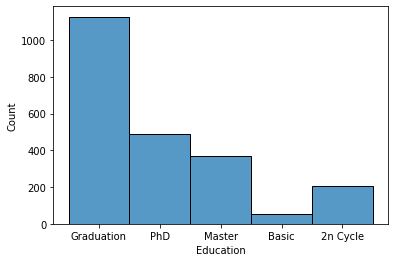

In [6]:
sns.histplot(df_customers['Education'])

<AxesSubplot:xlabel='Marital_Status', ylabel='Count'>

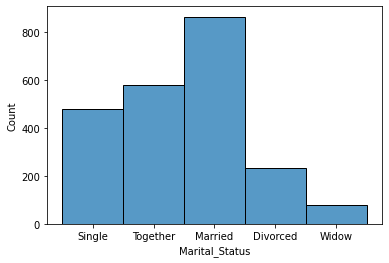

In [7]:
remove_list = ['YOLO','Absurd','Alone']
df_customers = df_customers[~df_customers['Marital_Status'].isin(remove_list)]
sns.histplot(df_customers['Marital_Status'])

<AxesSubplot:xlabel='Income', ylabel='Count'>

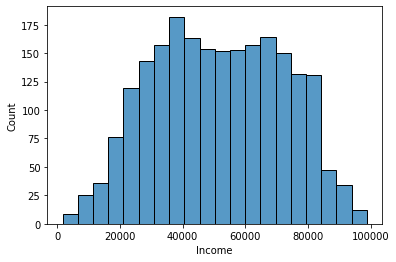

In [8]:
df_customers= df_customers[df_customers['Income']<100000]
sns.histplot(df_customers['Income'])

<AxesSubplot:xlabel='Kidhome', ylabel='Count'>

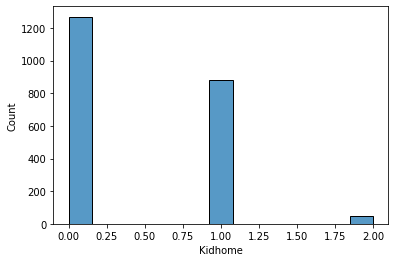

In [9]:
sns.histplot(df_customers['Kidhome'])

<AxesSubplot:xlabel='Teenhome', ylabel='Count'>

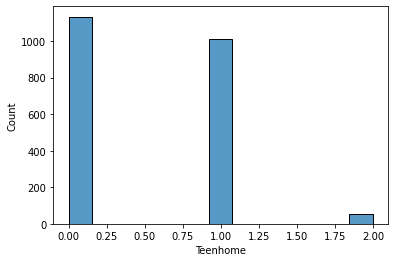

In [10]:
sns.histplot(df_customers['Teenhome'])

<AxesSubplot:xlabel='Recency', ylabel='Count'>

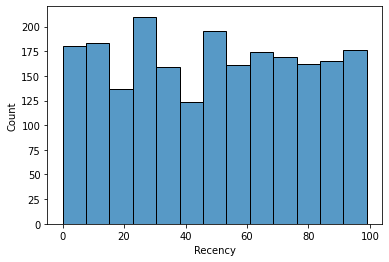

In [11]:
sns.histplot(df_customers['Recency'])

<AxesSubplot:xlabel='NumWebVisitsMonth', ylabel='Count'>

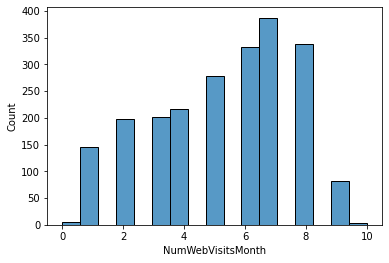

In [12]:
df_customers= df_customers[df_customers['NumWebVisitsMonth']<12]
sns.histplot(df_customers['NumWebVisitsMonth'])

<AxesSubplot:xlabel='Complain', ylabel='Count'>

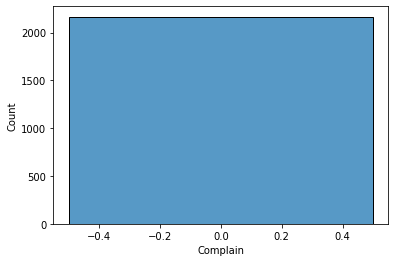

In [13]:
df_customers= df_customers[df_customers['Complain']<1]
sns.histplot(df_customers['Complain'])

<AxesSubplot:xlabel='Total_Purchases', ylabel='Count'>

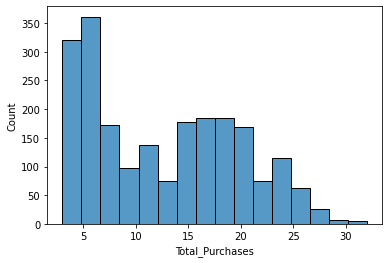

In [14]:
sns.histplot(df_customers['Total_Purchases'])

                            OLS Regression Results                            
Dep. Variable:        Total_Purchases   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     312.7
Date:                Wed, 16 Feb 2022   Prob (F-statistic):               0.00
Time:                        13:59:04   Log-Likelihood:                -6176.1
No. Observations:                2166   AIC:                         1.238e+04
Df Residuals:                    2152   BIC:                         1.246e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

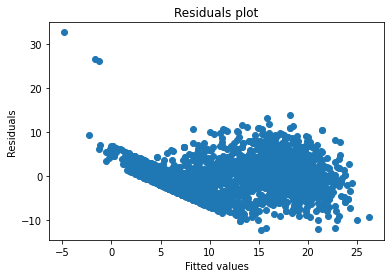

In [15]:

est = smf.ols('Total_Purchases ~  C(Education) + C(Marital_Status) + Income + Kidhome + Teenhome + Recency + NumWebVisitsMonth ', df_customers).fit()
print(est.summary())

#Residual plot 
plt.scatter(est.fittedvalues,est.resid)
plt.ylabel('Residuals')
plt.xlabel('Fitted values')
plt.title('Residuals plot')
plt.show()

                            OLS Regression Results                            
Dep. Variable:        Total_Purchases   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     1017.
Date:                Wed, 16 Feb 2022   Prob (F-statistic):               0.00
Time:                        13:59:04   Log-Likelihood:                -6178.4
No. Observations:                2166   AIC:                         1.237e+04
Df Residuals:                    2161   BIC:                         1.240e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -2.5307      0.54

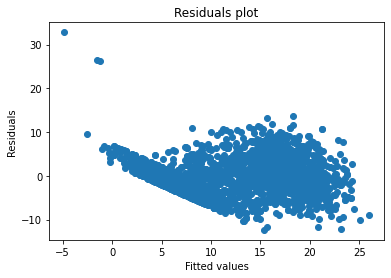

In [16]:
est = smf.ols('Total_Purchases ~  Income + Kidhome + Teenhome +  NumWebVisitsMonth ', df_customers).fit()
print(est.summary())

#Residual plot 
plt.scatter(est.fittedvalues,est.resid)
plt.ylabel('Residuals')
plt.xlabel('Fitted values')
plt.title('Residuals plot')
plt.show()

# Introduction

Resampling methods are techniques used in modern statistical analysis to take multiple samples from our original samples in order to refit a model multiple times to get more information about the fitted model. For example, in order to estimate the variability of a linear regression fit, it is possible to repeatedly draw different samples from the training data, fit a linear regression to each one of the samples, and then examine the variation of the resulting fits. This approach may allow us to obtain information that would not be available from fitting the model only
once using the original training sample. Also, the resampling methods allow the model performance assesment and the model selection processes to be done while mitigating the biases that can come from the sample used for the statistical analysis.

# Cross-validation

## Validation approach

In order to asses the prediction performance of a model, we have talked about the importance of separating the sample into a training set to fit our model and a validation set or hold-out set that is hidden from the model and used to see how the model does when predicting observations that it has not seen using the validation set MSE (or one of the other error metrics that we saw before). However, until now we have only talked about partitioning our data once into these two types of sets and we did not use a specific criteria to make that partition. The problem of making a single partition is that the validation MSE that is gotten can be different if the data was partitioned in a different way. Let us see an example that ilustrates why making a single partitioning of the data can lead to biased results in the validation MSE:

<figure>
<img src="/work/indu5012_case_7/fig/Validation_bias.PNG" align="center"/> 

<figcaption align = "center"><b>Fig. 7.1 - Validation MSE for a polynomial regression. The graph in the left shows the results when partitioning the data only once and the one in the right shows the results when making ten different data splits</b>.<i>Taken from (James, G., Witten, D., Hastie, T., & Tibshirani, R. (2013))</i></figcaption>
</figure> 

### Leave-one-out cross-validation

In order to mitigate the bias caused by the partitioning of the data, one of the methods of resampling is the leave-one-out cross-validation (LOOCV). In this method, one of the observations is chosen to be the validation set and all of the other observations in the dataset will be in the training set. Then, the fitted model will predict the value for the output variable in the only observation in the validation set and the validation MSE is calculated. Then, the MSE for the $i^{th}$ observation will be calculated as: $MSE_i=(y_i-\hat y_i)^2$. this process is repeated until all of the observations have been used in the validation set. The following example helps to illustrate how the LOOCV works:  

<figure>
<img src="/work/indu5012_case_7/fig/LOOCV.PNG" align="center"/> 

<figcaption align = "center"><b>Fig. 7.2 - Leave-one-out cross-validation</b>.<i>Taken from (James, G., Witten, D., Hastie, T., & Tibshirani, R. (2013))</i></figcaption>
</figure> 

When the process is finished, an average MSE is calculated by averaging all of the $n$ MSE's that were obtained during the LOOCV. By averaging these validation MSE's an error metric with less bias is calculated. Using the average validation MSE, now the models can be compared in a fairer way. The average validation MSE is calculated as: <center>$CV_{LOO}=\frac{1}{n}\sum_{i=1}^n MSE_i$ </center>

Let us see how we can code the LOOCV while using the Boston housing data:

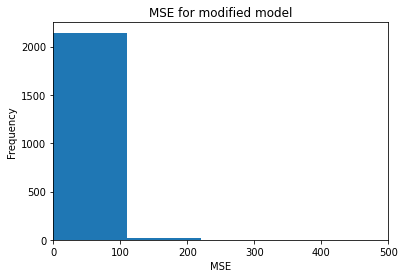

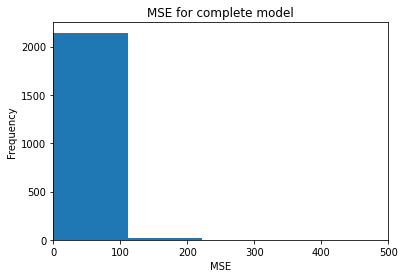

Modified model LOOCV MSE: 17.697735454728356
Complete model LOOCV MSE: 17.80710545711573


In [17]:
#Definition of arrays that will contain the squared differences
mse_comp = np.zeros(len(df_customers)) 
mse_mod = np.zeros(len(df_customers))

for i in range(len(df_customers)):
    #Indexes of the validation set (all but i)
    idx_train = np.asarray(list(set(range(len(df_customers))) - set([i])))
    
    #Dataframe partition into training and validation set using their indexes
    df_customers_val = df_customers.iloc[[i]]
    #print(df_customers_val)
    df_customers_train = df_customers.iloc[idx_train]
    
    #Complete multiple linear regression model
    est_comp = smf.ols('Total_Purchases ~  C(Education) + C(Marital_Status) + Income + Kidhome + Teenhome + Recency + NumWebVisitsMonth ', df_customers_train).fit(cov_type='HC1')
    #Modified multiple linear regression model
    est_mod = smf.ols('Total_Purchases ~  Income + Kidhome + Teenhome +  NumWebVisitsMonth ', df_customers_train).fit(cov_type='HC1')
    
    #Storing the squared differences between the fitted price and the real price
    mse_comp[i] = np.mean((est_comp.predict(df_customers_val)-df_customers_val["Total_Purchases"])**2)
    mse_mod [i] = np.mean((est_mod.predict(df_customers_val)-df_customers_val["Total_Purchases"])**2)

plt.hist(mse_mod,bins=10)
plt.ylabel('Frequency')
plt.xlabel('MSE')
plt.title('MSE for modified model')
plt.xlim(0, 500)

plt.show()

plt.hist(mse_comp,bins=10)
plt.ylabel('Frequency')
plt.xlabel('MSE')
plt.title('MSE for complete model')
plt.xlim(0, 500)
plt.show()

print("Modified model LOOCV MSE:", np.mean(mse_mod) )
print("Complete model LOOCV MSE:", np.mean(mse_comp) )

The LOOCV method has some clear advantages over the validation method that we have previously seen. First, this method has far less bias in its performance metrics due to every training set containing $n-1$ observations, only one less than the complete dataset. Therefore, the validation error will not have such an overestimation of the validation error when compared to other validation approach. The second advantage of the LOOCV is that there is no randomness when selecting the validation and training sets as all of the observations will be a part, at some point, of the validation set and the training set due to the way the data splits are made.

However, the LOOCV method can be computationally inefficient as the model has to be fit $n$ times. This fact is specially problematic when $n$ is extremely large. On that account, let us see a different approach for the cross-validation process that solves this problem.

## $k$-fold cross-validation

The $k$-fold CV approach consists in partitioning the data randomly into $k$ different data splits, or folds, of approximately the same size. Then, the first fold is used as the validation set and the other $k-1$ folds are used as the training set. After fitting the model, the first validation MSE, $MSE_1$, is calculated over the validation set. This process is repeated $k$ times, where each time a different fold is used as the validation set and the other $k-1$ sets are used as training set. Then, the $k$-fold cross-validation MSE is calculated as the mean of the $k$ validation MSE's : <center>$CV_{(k)}=\frac{1}{n}\sum_{i=1}^n MSE_i$ </center>

Notice that the LOOCV process is a specific case of a $k$-fold cross-validation process where $k=n$. When using $k$-fold CV, usually one uses $k=5$ or $k=10$. When using $k$-fold CV this way, the process becomes more viable than LOOCV, specially when $n$ is really big.

A graphical example of a 5-fold cross-validation process can be seen in the following image:

<figure>
<img src="/work/indu5012_case_7/fig/K-fold.PNG" align="center"/> 

<figcaption align = "center"><b>Fig. 7.3 - K-fold cross-validation</b>.<i>Taken from (James, G., Witten, D., Hastie, T., & Tibshirani, R. (2013))</i></figcaption>
</figure> 

Now, when comparing the the a LOOCV and a 10-fold CV in terms of the obtained MSE's, the results can be very similar as shown in the following image:

<figure>
<img src="/work/indu5012_case_7/fig/LOOCV vs K-fold.PNG" align="center"/> 

<figcaption align = "center"><b>Fig. 7.4 - LOOCV vs. 9 different K-fold cross-validations</b>.<i>Taken from (James, G., Witten, D., Hastie, T., & Tibshirani, R. (2013))</i></figcaption>
</figure> 

When taking these comparisons into account the $k$-fold cross-validation is generally a better aproach than LOOCV. Let us see how the $k$-fold cross-validation can be implemented:

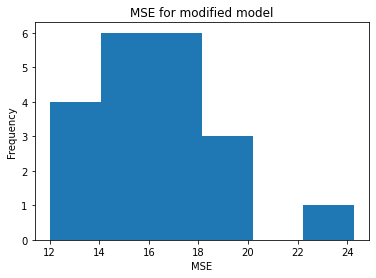

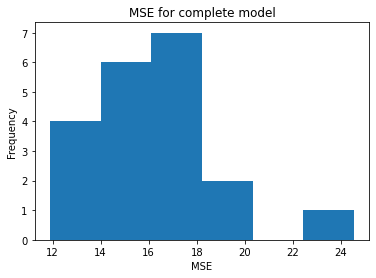

Modified model KFCV MSE: 16.228585714534084
Complete model KFCV MSE: 16.31360326263535


In [18]:

#Number of folds
k=20

#Use of KFold function
kf = KFold(n_splits=k, shuffle = True)

#Definition of arrays that will contain the squared differences
mse_comp = np.zeros(k) 
mse_mod = np.zeros(k)

for i in range(k):
    result = next(kf.split(df_customers), None)

    #Dataframe partition into training and validation set using their indexes
    df_customers_train = df_customers.iloc[result[0]]
    df_customers_val = df_customers.iloc[result[1]]
    
    #Complete multiple linear regression model
    est_comp = smf.ols('Total_Purchases ~  C(Education) + C(Marital_Status) + Income + Kidhome + Teenhome + Recency + NumWebVisitsMonth ', df_customers_train).fit(cov_type='HC1')
    #Modified multiple linear regression model
    est_mod = smf.ols('Total_Purchases ~  Income + Kidhome + Teenhome +  NumWebVisitsMonth ', df_customers_train).fit(cov_type='HC1')
    
    #Storing the squared differences between the fitted price and the real price
    mse_comp[i] = np.mean((est_comp.predict(df_customers_val)-df_customers_val["Total_Purchases"])**2)
    mse_mod [i] = np.mean((est_mod.predict(df_customers_val)-df_customers_val["Total_Purchases"])**2)

plt.hist(mse_mod, bins= 'auto')
plt.ylabel('Frequency')
plt.xlabel('MSE')
plt.title('MSE for modified model')
plt.show()

plt.hist(mse_comp, bins= 'auto')
plt.ylabel('Frequency')
plt.xlabel('MSE')
plt.title('MSE for complete model')
plt.show()

print("Modified model KFCV MSE:", np.mean(mse_mod) )
print("Complete model KFCV MSE:", np.mean(mse_comp) )

    

## Bootstrap

We have talked about how the estimation of the models can change when different samples are taken, and the variances of the estimation are a quantification of how much the estimation changes when different samples are used to fit the model. However, sometimes it is not easy to take different samples to see how the model's estimation and performance changes when different samples are used. The **bootstrap** method is a powerful concept that can help to quantify this uncertainty when having only one sample. This tool refers to the simulation of different samples using the only sample that one has taken. In order to generate the multiple samples, one can sample $n$ observations from the original data, and this sampling is made with replacement, which means that the same observation can be multiple times in the bootstrap sample. A graphical example of different bootstrap samples can be seen in the following image:

<figure>
<img src="/work/indu5012_case_7/fig/Bootstrap.PNG" align="center"/> 

<figcaption align = "center"><b>Fig. 7.5 - B bootstrap samples with 3 observations generated with an original sample with three observations</b>.<i>Taken from (James, G., Witten, D., Hastie, T., & Tibshirani, R. (2013))</i></figcaption>
</figure> 

Then, after generating the multiple bootstrap samples, they can be used as emulations of different samples taken from the original population. If the sample you had was a good representation of the original population, the bootstrap samples generated with the original sample are a good representation of different samples you could get from the original population. Now, let us see how we can use the bootstrap resampling method and what can be done with it:


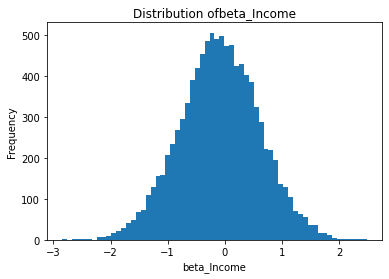

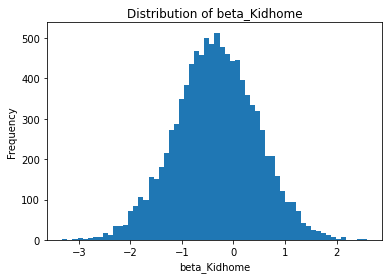

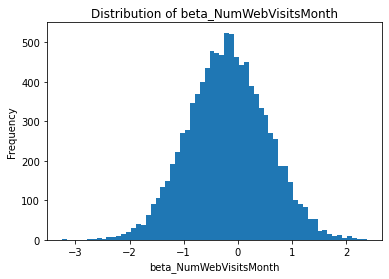

In [19]:
iterations = 10000
n= 506

beta_Income = np.zeros(iterations)
beta_Kidhome = np.zeros(iterations)
beta_NumWebVisitsMonth = np.zeros(iterations)

for i in range(iterations):
    idx = np.random.choice(range(df_customers.shape[0]),n)
    df_customers_boostrap = df_customers.iloc[idx,:]
    est_mod = smf.ols('Total_Purchases ~  C(Education) + C(Marital_Status) + Income + Kidhome + Teenhome + Recency + NumWebVisitsMonth ', df_customers_boostrap).fit(cov_type='HC1')
    beta_Income[i] = est_mod.params[2]
    beta_Kidhome[i] = est_mod.params[3]
    beta_NumWebVisitsMonth[i] = est_mod.params[6]


plt.hist(beta_Income, bins= 'auto')
plt.ylabel('Frequency')
plt.xlabel('beta_Income')
plt.title('Distribution ofbeta_Income')
plt.show()

plt.hist(beta_Kidhome, bins= 'auto')
plt.ylabel('Frequency')
plt.xlabel('beta_Kidhome')
plt.title('Distribution of beta_Kidhome')
plt.show()

plt.hist(beta_NumWebVisitsMonth, bins= 'auto')
plt.ylabel('Frequency')
plt.xlabel('beta_NumWebVisitsMonth')
plt.title('Distribution of beta_NumWebVisitsMonth')
plt.show()
    

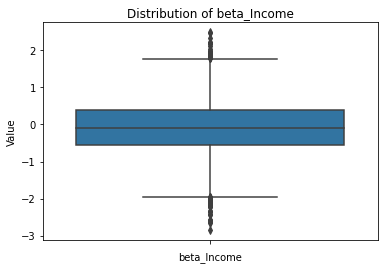

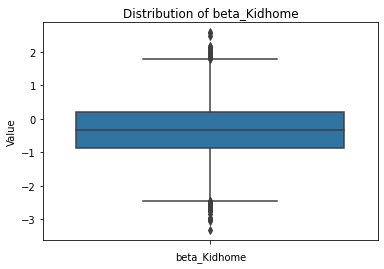

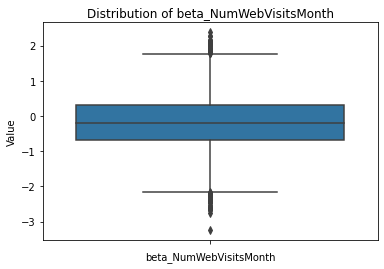

In [20]:
sns.boxplot(y=beta_Income)
plt.ylabel('Value')
plt.xlabel('beta_Income')
plt.title('Distribution of beta_Income')
plt.show()

sns.boxplot(y=beta_Kidhome)
plt.ylabel('Value')
plt.xlabel('beta_Kidhome')
plt.title('Distribution of beta_Kidhome')
plt.show()

sns.boxplot(y=beta_NumWebVisitsMonth)
plt.ylabel('Value')
plt.xlabel('beta_NumWebVisitsMonth')
plt.title('Distribution of beta_NumWebVisitsMonth')
plt.show()


In [21]:
print(est_mod.params)

Intercept                       -1.146787
C(Education)[T.Basic]            0.255249
C(Education)[T.Graduation]       0.237258
C(Education)[T.Master]           0.074230
C(Education)[T.PhD]              0.576688
C(Marital_Status)[T.Married]     1.002892
C(Marital_Status)[T.Single]     -0.013552
C(Marital_Status)[T.Together]    1.538368
C(Marital_Status)[T.Widow]       0.454590
Income                           0.000230
Kidhome                         -3.391473
Teenhome                         0.060897
Recency                          0.012022
NumWebVisitsMonth                0.358207
dtype: float64


As it can be seen, using the bootstrap method you can see how the estimation of the coefficients of a model vary when different samples are taken. Also, for example, you can calculate the standard error or the variance of the estimation of a specific coefficient, even if it is automatically calculated by the linear regression model:

In [22]:
#Standard deviation of bootstrap-generated coefficients
print("beta_Income Std: ", np.std(beta_Income))
print("beta_Kidhome Std: ", np.std(beta_Kidhome))
print("beta_NumWebVisitsMonth Std: ", np.std(beta_NumWebVisitsMonth))

#Standard deviation calculated by the model
est_mod = smf.ols("Total_Purchases ~  C(Education) + C(Marital_Status) + Income + Kidhome + Teenhome + Recency + NumWebVisitsMonth", df_customers).fit(cov_type='HC1')
est_mod.summary()

beta_Income Std:  0.6984653922372315
beta_Kidhome Std:  0.7906943012102173
beta_NumWebVisitsMonth Std:  0.7322233187193076


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Total_Purchases   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     330.0
Date:                Wed, 16 Feb 2022   Prob (F-statistic):               0.00
Time:                        14:08:37   Log-Likelihood:                -6176.1
No. Observations:                2166   AIC:                         1.238e+04
Df Residuals:                    2152   BIC:                         1.246e+04
Df Model:                          13                                         
Covariance Type:                  HC1                                         
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        -2.6821      0.992     -2.704      0.007      -4.626      -0.738
C(Education)[T.Basic]             0.3800      0.550      0.691      0.489      -0.698       1.457
C(Education)[T.Graduation]       -0.0832      0.331     -0.251      0.802      -0.732       0.566
C(Education)[T.Master]           -0.3324      0.376     -0.884      0.377      -1.069       0.404
C(Education)[T.PhD]              -0.2145      0.376     -0.571      0.568      -0.950       0.521
C(Marital_Status)[T.Married]      0.1011      0.323      0.313      0.754      -0.532       0.734
C(Marital_Status)[T.Single]      -0.1934      0.350     -0.553      0.580      -0.879       0.492
C(Marital_Status)[T.Together]     0.0809      0.333      0.243      0.808      -0.572       0.734
C(Marital_Status)[T.Widow]        0.0220      0.593      0.037      0.970      -1.140       1.184
Income                            0.0003   1.03e-05     25.722      0.000       0.000       0.000
Kidhome                          -3.5245      0.210    -16.772      0.000      -3.936      -3.113
Teenhome                         -0.4092      0.197     -2.073      0.038      -0.796      -0.022
Recency                           0.0033      0.003      1.036      0.300      -0.003       0.010
NumWebVisitsMonth                 0.6174      0.085      7.281      0.000       0.451       0.784
==============================================================================
Omnibus:                      270.684   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              830.237
Skew:                           0.640   Prob(JB):                    5.20e-181
Kurtosis:                       5.750   Cond. No.                     5.27e+05
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
[2] The condition number is large, 5.27e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## California Housing Problem

We can apply these methods in any lineal regression and any dataset you see fit.

In [24]:
from sklearn.datasets import fetch_california_housing

california_housing = fetch_california_housing()
df_california = pd.DataFrame(california_housing.data,columns=california_housing.feature_names)
df_california['Price']=pd.Series(california_housing.target*1000)
df_california = df_california[df_california['Price']<=4900]
df_california['MedInc']=df_california['MedInc']*1000
df_california.dropna(inplace=True)
df_california.head(3)



,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8325.2,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4526.0
1,8301.4,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3585.0
2,7257.4,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3521.0


In [26]:
est = smf.ols('Price ~ MedInc  + AveBedrms + AveOccup + Latitude ', df_california).fit()

print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.427
Model:                            OLS   Adj. R-squared:                  0.427
Method:                 Least Squares   F-statistic:                     3656.
Date:                Wed, 16 Feb 2022   Prob (F-statistic):               0.00
Time:                        14:09:33   Log-Likelihood:            -1.5707e+05
No. Observations:               19609   AIC:                         3.141e+05
Df Residuals:                   19604   BIC:                         3.142e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2097.7137     88.781     23.628      0.0

## Excercise 1

Run the the Leave-one-out cross-validation resampling method on the california dataset

**Answer**

## Excercise 2

Run the the $k$-fold cross-validation resampling method on the california dataset. Each one of you takes a different value for k

**Answer**

## Excercise 3

Run the the Bootstraping resampling method on the california dataset.

**Answer**

## Excercise 4
 
Obtain the boxplot of the distribution of each one of the coefficients on the california dataset.

**Answer**

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=96262903-a28f-4719-a328-dc59e3cfa77f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>